In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from IPython.display import Image  
import seaborn as sns; sns.set(color_codes=True)
import statsmodels.api as sm 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML, display
import tabula
import lxml
import warnings
warnings.filterwarnings("ignore")

**Data tool used** <br>
For more information on stargazer, used for Outreg2 style export of regression, read here:
* https://cran.r-project.org/web/packages/stargazer/stargazer.pdf
* https://github.com/mwburke/stargazer
* https://www.jakeruss.com/cheatsheets/stargazer/

## Governors data

**GOVERNORS ROSTER 2020 - GOVERNORS’ POLITICAL AFFILIATIONS & TERMS OF OFFICE** <br>
* From National Governors Association
* https://www.nga.org/wp-content/uploads/2019/07/Governors-Roster.pdf
* Only 55
* This is **2020**

*cite:* National Governor's Association. (2019). Governors' political affiliations & terms of office, 2020. Retrieved from https://www.nga.org/wp-content/uploads/2019/07/Governors-Roster.pdf


In [2]:
governors_data = tabula.read_pdf("Governors-Roster.pdf", pages=1)[0]

In [3]:
governors_data.rename(columns={"State or jurisdiction": "State_or_jurisdiction", 
                               "Unnamed: 0": "Governor", 
                               "Governor": "Party", 
                               "Present term": "Term_start", 
                               "Present term.1": "Term_end", 
                               "Number of": "Number_of_previous_terms",
                               "Maximum": "Maximum_consecutive_terms"}, inplace=True)

# first row has part of the title, therfore it is removed
governors_data = governors_data.drop([0])

In [4]:
# remove tertories 
states_governors_data = governors_data[~governors_data["State_or_jurisdiction"].str.contains(
    "Guam|Puerto Rico|Virgin Islands|American Samoa|Northern Mariana Is.", na=False)]

In [5]:
# get party of each Governor, R or D
states_governors_data["Party"] = states_governors_data["Governor"]
states_governors_data["Party"] = states_governors_data["Party"].str.slice(start = -2, stop=-1)

In [6]:
# remove fotnotes to keep only dates and numbers
states_governors_data["Term_start"] = states_governors_data["Term_start"].str.split().str[0]
states_governors_data["Term_end"] = states_governors_data["Term_end"].str.split().str[0]
states_governors_data["Number_of_previous_terms"] = states_governors_data["Number_of_previous_terms"].str.split().str[0]
states_governors_data["Maximum_consecutive_terms"] = states_governors_data["Maximum_consecutive_terms"].str.split().str[0]

In [7]:
# replacing fotnotes and dashes to keep only dates and numbers
states_governors_data = states_governors_data.fillna(0)
states_governors_data["Maximum_consecutive_terms"] = states_governors_data["Maximum_consecutive_terms"].replace(["—", "(e)"], 0)

In [8]:
# rmoving unecessry data
states_governors_data = states_governors_data[["State_or_jurisdiction", "Governor", "Party"]]
states_governors_data["Party"].replace({"R": "Republican", "D": "Democratic"}, inplace=True)

In [9]:
states_governors_data

,State_or_jurisdiction,Governor,Party
1,Alabama,Kay Ivey (R),Republican
2,Alaska,Mike Dunleavy (R),Republican
4,Arizona,Doug Ducey (R),Republican
5,Arkansas,Asa Hutchinson (R),Republican
6,California,Gavin Newsom (D),Democratic
7,Colorado,Jared Polis (D),Democratic
8,Connecticut,Ned Lamont (D),Democratic
9,Delaware,John Carney (D),Democratic
10,Florida,Ron DeSantis (R),Republican
11,Georgia,Brian Kemp (R),Republican


**History of Women Governors**
* Data from here: https://cawp.rutgers.edu/history-women-governors

*cite:* Center for American Women and Politics. (2021). History of women governors. Retrieved February 12, 2021, from https://cawp.rutgers.edu/history-women-governors 

In [10]:
cawp_data = pd.read_html("https://cawp.rutgers.edu/history-women-governors")[0]

In [11]:
cawp_data

,Name (Party-State),Dates Served,Special Circumstances
0,Nellie Tayloe Ross (D-WY),1925-1927,Won special election to replace deceased husband.
1,"Miriam ""Ma"" Ferguson (D-TX)","1925-1927, 1933-1935",Inaugurated 15 days after Ross; elected as sur...
2,Lurleen Wallace (D-AL),1967-1968,Elected as surrogate for husband who could not...
3,Ella Grasso (D-CT),1975-1980,First woman elected governor in her own right;...
4,Dixy Lee Ray (D-WA),1977-1981,NaN
5,Vesta Roy (R-NH),1982-1983,Elected to state senate and chosen as senate p...
6,Martha Layne Collins (D-KY),1984-1987,NaN
7,Madeleine Kunin (D-VT),1985-1991,First and only woman to serve three terms as g...
8,Kay Orr (R-NE),1987-1991,First Republican woman elected governor and fi...
9,Rose Mofford (D-AZ),1988-1991,"Elected as secretary of state, succeeded gover..."


In [12]:
# last row and row 19 has the Governor of Puerto Rico, therfore it is removed
cawp_data = cawp_data.drop([45])
cawp_data = cawp_data.drop([19])

In [13]:
# get party and state of each Governor
cawp_data["Party-State"] = cawp_data["Name (Party-State)"].str.slice(start = -5, stop=-1)

In [14]:
cawp_data[["Party", "State"]] = cawp_data["Party-State"].str.split("-", expand=True)

In [15]:
cawp_data = cawp_data.drop(columns=["Party-State"])

In [16]:
cawp_data

,Name (Party-State),Dates Served,Special Circumstances,Party,State
0,Nellie Tayloe Ross (D-WY),1925-1927,Won special election to replace deceased husband.,D,WY
1,"Miriam ""Ma"" Ferguson (D-TX)","1925-1927, 1933-1935",Inaugurated 15 days after Ross; elected as sur...,D,TX
2,Lurleen Wallace (D-AL),1967-1968,Elected as surrogate for husband who could not...,D,AL
3,Ella Grasso (D-CT),1975-1980,First woman elected governor in her own right;...,D,CT
4,Dixy Lee Ray (D-WA),1977-1981,NaN,D,WA
5,Vesta Roy (R-NH),1982-1983,Elected to state senate and chosen as senate p...,R,NH
6,Martha Layne Collins (D-KY),1984-1987,NaN,D,KY
7,Madeleine Kunin (D-VT),1985-1991,First and only woman to serve three terms as g...,D,VT
8,Kay Orr (R-NE),1987-1991,First Republican woman elected governor and fi...,R,NE
9,Rose Mofford (D-AZ),1988-1991,"Elected as secretary of state, succeeded gover...",D,AZ


In [17]:
current_female_governors = cawp_data.iloc[35:]

In [18]:
current_female_governors

,Name (Party-State),Dates Served,Special Circumstances,Party,State
36,Kate Brown (D-OR),2015-present,"Elected as secretary of state, succeeded gover...",D,OR
37,Gina Raimondo (D-RI),2015-present,NaN,D,RI
38,Kay Ivey (R-AL),2017-present,"Elected as lieutenant governor, succeeded gove...",R,AL
39,Kim Reynolds (R-IA),2017-present,"Elected as lieutenant governor, succeeded gove...",R,IA
40,Laura Kelly (D-KS),2019-present,NaN,D,KS
41,Michelle Lujan Grisham (D-NM),2019-present,NaN,D,NM
42,Janet Mills (D-ME),2019-present,NaN,D,ME
43,Kristi Noem (R-SD),2019-present,NaN,R,SD
44,Gretchen Whitmer (D-MI),2019-present,NaN,D,MI


In [19]:
current_female_governors = current_female_governors[["Name (Party-State)", "State"]]

In [20]:
# rename colums fro murge
current_female_governors.columns = ["Name of female governor", 
                                    "State abbreviation"]

In [21]:
current_female_governors

,Name of female governor,State abbreviation
36,Kate Brown (D-OR),OR
37,Gina Raimondo (D-RI),RI
38,Kay Ivey (R-AL),AL
39,Kim Reynolds (R-IA),IA
40,Laura Kelly (D-KS),KS
41,Michelle Lujan Grisham (D-NM),NM
42,Janet Mills (D-ME),ME
43,Kristi Noem (R-SD),SD
44,Gretchen Whitmer (D-MI),MI


In [22]:
past_female_governors = cawp_data.iloc[:35]

In [23]:
number_past_female_governors_per_state = pd.Series.to_frame(past_female_governors["State"].value_counts())

In [24]:
# rename colums fro murge
number_past_female_governors_per_state.columns = ["Number of previos female governors"]

In [25]:
number_past_female_governors_per_state

,Number of previos female governors
AZ,4
NH,3
KS,2
CT,2
TX,2
WA,2
UT,1
LA,1
HI,1
NC,1


## Majority State Senate

**State legislative elections, 2020** <br>
Ballotpedia is the digital encyclopedia of American politics and elections. Our goal is to inform people about politics by providing accurate and objective information about politics at all levels of government. We are firmly committed to neutrality in our content.
Ballotpedia is sponsored by the Lucy Burns Institute, a nonpartisan and nonprofit organization headquartered in Middleton, Wisconsin. The mission of the Lucy Burns Institute is to empower its audience to engage in democracy by delivering exceptionally high quality information. The Lucy Burns Institute/Ballotpedia is a 501(c)(3) nonprofit funded by donations from individuals and foundations. We also provide Premium Research Services; sell access to our election and political information (such as candidate lists, information about ballot measures, and more) via our API; and receive revenue through digital ad sales.

* about data: State legislative chamber control before and after 2020 elections
* data source: https://ballotpedia.org/State_legislative_elections,_2020

*cite:* Ballotpedia. (2021). State legislative elections, 2020. Retrieved February 12, 2021, from https://ballotpedia.org/State_legislative_elections,_2020 

In [26]:
state_legislative_elections = pd.read_html("https://ballotpedia.org/State_legislative_elections,_2020", header =0)[4]

In [27]:
# get nice columns titles
state_legislative_elections = state_legislative_elections.drop(0)
state_legislative_elections = state_legislative_elections.drop(1)
state_legislative_elections = state_legislative_elections.reset_index(drop=True)

# rename columns titles
state_legislative_elections.columns = ["State", 
                                     "Pre-election majority State Senate",
                                     "Pre-election majority State House",
                                     "Full control Pre-election",
                                     "Post-election majority State Senate",
                                     "Post-election majority State House",
                                     "Full control Post-election",
                                     "Change? Y/N",
                                     "empty"]

# drop useless columns
state_legislative_elections = state_legislative_elections.drop(["Change? Y/N", "empty"], axis=1)

In [28]:
def majority_calculator (state_legislative_elections):
    
    if state_legislative_elections["Pre-election majority State Senate"] == state_legislative_elections["Pre-election majority State House"]:
         state_legislative_elections["Full control Pre-election"] = state_legislative_elections["Pre-election majority State Senate"]
        
    else:
         state_legislative_elections["Full control Pre-election"] = "Split"
        
        
    if state_legislative_elections["Post-election majority State Senate"] == state_legislative_elections["Post-election majority State House"]:
        state_legislative_elections["Full control Post-election"] = state_legislative_elections["Post-election majority State Senate"] 
       
    else:
        state_legislative_elections["Full control Post-election"] = "Split"
        
    return state_legislative_elections

In [29]:
state_legislative_elections = state_legislative_elections.apply(majority_calculator, axis=1)

In [30]:
state_legislative_elections = state_legislative_elections[["State", 
                                                           "Full control Pre-election", 
                                                           "Full control Post-election"]]

In [31]:
# rename colums for murge
state_legislative_elections.columns = ["State", 
                                        "Full control of state legislative Pre-election", 
                                        "Full control of state legislative Post-election"]

In [32]:
state_legislative_elections

,State,Full control of state legislative Pre-election,Full control of state legislative Post-election
0,Alabama,Republican,Republican
1,Alaska,Split,Split
2,Arizona,Republican,Republican
3,Arkansas,Republican,Republican
4,California,Democratic,Democratic
5,Colorado,Democratic,Democratic
6,Connecticut,Democratic,Democratic
7,Delaware,Democratic,Democratic
8,Florida,Republican,Republican
9,Georgia,Republican,Republican


## COVID-19 data

**KFF COVID-19 Data Repository** <br>
* Data from here: https://github.com/KFFData/COVID-19-Data
* Dashboard here: https://www.kff.org/coronavirus-covid-19/issue-brief/state-covid-19-data-and-policy-actions/
* State data: https://www.kff.org/statedata/collection/covid-19-and-related-state-data/
* Info on pepole in hospital and thetingL https://github.com/KFFData/COVID-19-Data/tree/kff_master/State%20Trend%20Data
* State Social Distancing Actions (includs hitorical data): https://github.com/KFFData/COVID-19-Data/tree/kff_master/State%20Policy%20Actions/State%20Social%20Distancing%20Actions
* State Health Policy Actions (updated once a month): https://github.com/KFFData/COVID-19-Data/tree/kff_master/State%20Policy%20Actions/State%20COVID-19%20Health%20Policy%20Actions

Full data quary here: https://www.kff.org/statedata/custom-state-report/?view=3&i=251728~251870~32642~32646~32704~456016~32625~32441~458128~32444~459977~32123~32124~32137~32135~32150&g=us~al~ak~az~ar~ca~co~ct~de~dc~fl~ga~hi~id~il~in~ia~ks~ky~la~me~md~ma~mi~mn~ms~mo~mt~ne~nv~nh~nj~nm~ny~nc~nd~oh~ok~or~pa~ri~sc~sd~tn~tx~ut~vt~va~wa~wv~wi~wy

*Cite:* KFF. (2021). KFF's state health facts. Retrieved February 12, 2021, from https://www.kff.org/statedata/custom-state-report/?view=3&i=251728~251870~32642~32646~32704~456016~32625~32441~458128~32444~459977~32123~32124~32137~32135~32150&g=us~al~ak~az~ar~ca~co~ct~de~dc~fl~ga~hi~id~il~in~ia~ks~ky~la~me~md~ma~mi~mn~ms~mo~mt~ne~nv~nh~nj~nm~ny~nc~nd~oh~ok~or~pa~ri~sc~sd~tn~tx~ut~vt~va~wa~wv~wi~wy 

In [33]:
kff_data = pd.read_csv("kff_data.csv")

In [34]:
# drop all lines that have at least 5 NaN
kff_data = kff_data.dropna(thresh=5)
kff_data = kff_data.reset_index(drop=True)

In [35]:
# swith columns and rows
kff_data = kff_data.transpose()
kff_data.columns = kff_data.iloc[0]

In [36]:
# remove uneeded rows
kff_data = kff_data.drop("Data")
kff_data = kff_data.drop("Dist. of Columbia")
kff_data = kff_data.drop("United States")

In [37]:
list(kff_data)

['Total Private Health Insurance Spending',
 'Per Capita Private Health Insurance Spending',
 'Total Medicare Spending by Residence',
 'Per Enrollee Medicare Spending by Residence',
 'Life Expectancy at Birth (years)',
 'Total number, adults 18 and older',
 'Number at risk, adults 18 and older',
 'At-risk adults, as a share of all adults ages 18 and older',
 'Total number, adults under age 65',
 'Number at risk due to health conditions, adults under age 65',
 'Share of adults under age 65 at risk',
 'Total number, adults age 65 and older',
 'Older adults, as a share of all at-risk adults',
 'Health Spending per Capita',
 'Total Hospitals',
 'Total Hospital Beds',
 'Beds per 1,000 Population',
 'State/Local Government',
 'Non-Profit',
 'For-Profit',
 'Total',
 'ICU Beds',
 'ICU Beds per 10,000 Population',
 'Total Residents',
 'Children 0-18',
 'Adults 19-25',
 'Adults 26-34',
 'Adults 35-54',
 'Adults 55-64',
 '65+',
 'Total',
 'Metropolitan',
 'Nonmetropolitan',
 'Total',
 'Median Ann

In [38]:
kff_data = kff_data[["Beds per 1,000 Population", "ICU Beds per 10,000 Population"]]

In [39]:
kff_data

Data,"Beds per 1,000 Population","ICU Beds per 10,000 Population"
Alabama,3.1,3.9
Alaska,2.2,1.8
Arizona,1.9,2.5
Arkansas,3.2,2.9
California,1.8,2.1
Colorado,1.9,3.2
Connecticut,2,2.1
Delaware,2.2,2.7
Florida,2.6,3
Georgia,2.4,2.6


**The Atlantic’s data COVID Tracking Project** <br>
The COVID Tracking Project at The Atlantic’s data and website content is published under a Creative Commons CC BY 4.0 license, which requires users to attribute the source and license type (CC BY 4.0) when sharing our data or website content. Our preferred attribution is The COVID Tracking Project at The Atlantic or The COVID Tracking Project.

Data Definitions: https://covidtracking.com/about-data/data-definitions <br>
The data: https://covidtracking.com/data/download/all-states-history.csv

Includs:cases, death, test, and Hospitalization 

*Cite:* The Atlantic. (2021). COVID tracking project. Retrieved February 12, 2021, from https://covidtracking.com/ 


In [40]:
atlantic_data = pd.read_csv("https://covidtracking.com/data/download/all-states-history.csv")

In [41]:
atlantic_data

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-22,AK,290.0,NaN,1,NaN,1251.0,1251.0,39.0,8,...,1648785.0,18956,NaN,NaN,NaN,NaN,NaN,0,1648785.0,18956
1,2021-02-22,AL,9592.0,7526.0,0,2066.0,45128.0,45128.0,862.0,361,...,2260261.0,2586,NaN,NaN,115044.0,NaN,2260261.0,2586,NaN,0
2,2021-02-22,AR,5363.0,4311.0,6,1052.0,14570.0,14570.0,588.0,30,...,2605058.0,2434,NaN,NaN,NaN,429300.0,NaN,0,2605058.0,2434
3,2021-02-22,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-02-22,AZ,15502.0,13692.0,-3,1810.0,56994.0,56994.0,1590.0,48,...,7458884.0,25436,434783.0,NaN,NaN,NaN,3703153.0,9336,7458884.0,25436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20040,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20041,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20042,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20043,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [42]:
atlantic_data = atlantic_data[["date", "state", "death", "hospitalizedCumulative"]]

In [43]:
# select most updated 
atlantic_data_2021 = atlantic_data.loc[atlantic_data["date"] == "2021-02-14"]

In [44]:
atlantic_data_2021

,date,state,death,hospitalizedCumulative
448,2021-02-14,AK,282.0,1230.0
449,2021-02-14,AL,9242.0,44148.0
450,2021-02-14,AR,5265.0,14332.0
451,2021-02-14,AS,0.0,NaN
452,2021-02-14,AZ,14978.0,55667.0
453,2021-02-14,CA,46843.0,NaN
454,2021-02-14,CO,5824.0,22797.0
455,2021-02-14,CT,7381.0,12257.0
456,2021-02-14,DC,979.0,NaN
457,2021-02-14,DE,1283.0,NaN


In [45]:
# select first of September 
atlantic_data_2020 = atlantic_data.loc[atlantic_data["date"] == "2020-09-01"]

In [46]:
atlantic_data_2020

,date,state,death,hospitalizedCumulative
9744,2020-09-01,AK,39.0,246.0
9745,2020-09-01,AL,2200.0,14538.0
9746,2020-09-01,AR,814.0,4306.0
9747,2020-09-01,AS,0.0,NaN
9748,2020-09-01,AZ,5044.0,21405.0
9749,2020-09-01,CA,13018.0,NaN
9750,2020-09-01,CO,1946.0,7053.0
9751,2020-09-01,CT,4466.0,11180.0
9752,2020-09-01,DC,607.0,NaN
9753,2020-09-01,DE,605.0,NaN


In [47]:
atlantic_dates_data = pd.merge(atlantic_data_2020, 
                   atlantic_data_2021,
                   how="left",
                   left_on = ["state"],
                   right_on = ["state"])

In [48]:
atlantic_dates_data = atlantic_dates_data[[
                         "state",
                         "death_x",
                         "hospitalizedCumulative_x",
                         "death_y",
                         "hospitalizedCumulative_y"]]

In [49]:
# rename colums for murge
atlantic_dates_data.columns = ["State",
                                "Death 2020-09-01",
                                "Hospitalized Cumulative 2020-09-01",
                                "Death 2021-02-14",
                                "Hospitalized Cumulative 2021-02-14"]

In [50]:
atlantic_dates_data

,State,Death 2020-09-01,Hospitalized Cumulative 2020-09-01,Death 2021-02-14,Hospitalized Cumulative 2021-02-14
0,AK,39.0,246.0,282.0,1230.0
1,AL,2200.0,14538.0,9242.0,44148.0
2,AR,814.0,4306.0,5265.0,14332.0
3,AS,0.0,NaN,0.0,NaN
4,AZ,5044.0,21405.0,14978.0,55667.0
5,CA,13018.0,NaN,46843.0,NaN
6,CO,1946.0,7053.0,5824.0,22797.0
7,CT,4466.0,11180.0,7381.0,12257.0
8,DC,607.0,NaN,979.0,NaN
9,DE,605.0,NaN,1283.0,NaN


**COVID-19 US State Policy Database** <br>
The COVID-19 US State Policy Database tracks the dates when each US state implemented new social safety net, economic, and physical distancing policies in response to the COVID-19 pandemic, combined with data on existing health and social policies and information on state characteristics. This database is developed and maintained by researchers at the Boston University School of Public Health, and is updated at least biweekly.

We are working quickly to go through state government websites to make the policy database as complete and accurate as possible in a rapidly changing policy context. If you use data on a given policy, we encourage you to triangulate based on additional sources of policy data and to review the source documentation to consider the coding decisions that are right for your work. Of course, please email us if you note a discrepancy so we can improve the database for everyone.

Source documentation can be found at this link: www.tinyurl.com/statepolicysources

*Suggested Citation*: Raifman J, Nocka K, Jones D, Bor J, Lipson S, Jay J, and Chan P. (2020). "COVID-19 US state policy database." Available at: www.tinyurl.com/statepolicies

* Spreadsheet: https://docs.google.com/spreadsheets/d/1zu9qEWI8PsOI_i8nI_S29HDGHlIp2lfVMsGxpQ5tvAQ/edit#gid=973655443
* Data: https://github.com/USCOVIDpolicy/COVID-19-US-State-Policy-Database/blob/master/COVID-19%20US%20state%20policy%20database%202_12_2021.xlsx?raw=true
* Code (also at end of data spreadsheet): https://github.com/USCOVIDpolicy/COVID-19-US-State-Policy-Database/blob/master/CodeBook_2_12_2021.xlsx

In [51]:
cusp = pd.ExcelFile("https://github.com/USCOVIDpolicy/COVID-19-US-State-Policy-Database/blob/master/COVID-19%20US%20state%20policy%20database%202_17_2021.xlsx?raw=true", engine="openpyxl")
cusp.sheet_names

['State policy changes ', 'Details', 'Contributors', 'Notes']

In [52]:
cusp_data = pd.read_excel(cusp, "State policy changes ")

# drop NaN and change title columns
cusp_data = cusp_data.dropna(subset=["STATE"])
cusp_data.columns = cusp_data.iloc[0]
cusp_data = cusp_data.drop(cusp_data.index[0:4])
cusp_data = cusp_data.drop(12)

In [53]:
cusp_data

,State,State Abbreviation,FIPS Code,State of emergency,Date closed K-12 public schools,Closed day cares,Reopen day cares,Date banned visitors to nursing homes,Stay at home/ shelter in place,Stay at home order' issued but did not specifically restrict movement of the general public,...,2020 Minimum Wage,2020 Alternative Minimum Wage,2020 Minimum Wage for Tipped Workers,Different Minimum Wage for Smaller Businesses,[Planned] 2021 Minimum Wage,[Planned] 2022 Minimum Wage,[Planned] 2023 Minimum Wage,[Planned] 2024 Minimum Wage,[Planned] 2025 Minimum Wage,[Planned] 2026 Minimum Wage
4,Alabama,AL,1,2020-03-13 00:00:00,2020-03-20 00:00:00,2020-03-20 00:00:00,2020-05-23 00:00:00,2020-03-19 00:00:00,2020-04-04 00:00:00,0,...,.,.,2.13,0,.,.,.,.,.,.
5,Alaska,AK,2,2020-03-11 00:00:00,2020-03-16 00:00:00,0,0,0,2020-03-28 00:00:00,0,...,10.19,.,10.19,0,10.34,.,.,.,.,.
6,Arizona,AZ,4,2020-03-11 00:00:00,2020-03-16 00:00:00,0,0,0,2020-03-31 00:00:00,0,...,12,.,9,0,12.15,.,.,.,.,.
7,Arkansas,AR,5,2020-03-11 00:00:00,2020-03-17 00:00:00,0,0,2020-03-13 00:00:00,0,0,...,10,.,2.63,1,11,.,.,.,.,.
8,California,CA,6,2020-03-04 00:00:00,2020-03-23 00:00:00,0,0,0,2020-03-19 00:00:00,0,...,13,.,12,1,13,14,15,.,.,.
9,Colorado,CO,8,2020-03-11 00:00:00,2020-03-23 00:00:00,0,0,2020-03-12 00:00:00,2020-03-26 00:00:00,0,...,12,.,8.98,1,12.32,.,.,.,.,.
10,Connecticut,CT,9,2020-03-10 00:00:00,2020-03-17 00:00:00,0,0,2020-03-09 00:00:00,0,2020-03-23 00:00:00,...,12,.,6.38,0,13,14,15,.,.,.
11,Delaware,DE,10,2020-03-13 00:00:00,2020-03-16 00:00:00,2020-04-06 00:00:00,2020-06-15 00:00:00,0,2020-03-24 00:00:00,0,...,9.75,.,2.23,0,10.25,.,.,.,.,.
13,Florida,FL,12,2020-03-09 00:00:00,2020-03-17 00:00:00,0,0,2020-03-15 00:00:00,2020-04-03 00:00:00,0,...,8.56,.,5.54,0,$8.65/ $10.00,11,12,13,14,15
14,Georgia,GA,13,2020-03-14 00:00:00,2020-03-18 00:00:00,0,0,2020-04-03 00:00:00,2020-04-03 00:00:00,0,...,5.15,.,2.13,1,5.15,.,.,.,.,.


In [54]:
list(cusp_data)

['State',
 'State Abbreviation',
 'FIPS Code',
 'State of emergency',
 'Date closed K-12 public schools',
 'Closed day cares',
 'Reopen day cares',
 'Date banned visitors to nursing homes',
 'Stay at home/ shelter in place',
 "Stay at home order' issued but did not specifically restrict movement of the general public",
 'End/relax stay at home/shelter in place',
 'Closed other non-essential businesses',
 'Began to reopen businesses',
 'Religious Gatherings Exempt Without Clear Social Distance Mandate*',
 'Mandate face mask use by all individuals in public spaces',
 'Second mandate for facemasks by all individuals in public places',
 'Face mask mandate enforced by fines',
 'Face mask mandate enforced by criminal charge/citation',
 'No legal enforcement of face mask mandate',
 'Mandate face mask use by employees in public-facing businesses',
 'State ended statewide mask use by individuals in public spaces',
 'Attempt by state government to prevent local governments from implementing face

In [55]:
cusp_data_subset = cusp_data[["State",
 "State Abbreviation",
 "State of emergency",
 "Date closed K-12 public schools",
 "Closed day cares",
 "Reopen day cares",
 "Stay at home/ shelter in place",
 "Stay at home order' issued but did not specifically restrict movement of the general public",
 "End/relax stay at home/shelter in place",
 "Closed other non-essential businesses",
 "Began to reopen businesses",
 "Mandate face mask use by all individuals in public spaces",
 "Closed restaurants except take out",
 "Reopen restaurants",
 "Initially reopen restaurants for outdoor dining only",
 "Closed gyms",
 "Reopened gyms",
 "Closed movie theaters",
 "Reopened movie theaters",
 "Closed Bars",
 "Reopen bars",
 "Reopened hair salons/barber shops",
 "Reopen Religious Gatherings",
 "Reopen other non-essential retail",
 "Mandate quarantine for those entering the state from specific settings",
 "Mandate quarantine for all individuals entering the state",
 "Date all mandated quarantines ended",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Population 2018 ",
 "Square Miles",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "2019 Minimum Wage"
]]

In [56]:
cusp_data_subset

,State,State Abbreviation,State of emergency,Date closed K-12 public schools,Closed day cares,Reopen day cares,Stay at home/ shelter in place,Stay at home order' issued but did not specifically restrict movement of the general public,End/relax stay at home/shelter in place,Closed other non-essential businesses,...,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,2019 Minimum Wage
4,Alabama,AL,2020-03-13 00:00:00,2020-03-20 00:00:00,2020-03-20 00:00:00,2020-05-23 00:00:00,2020-04-04 00:00:00,0,2020-04-30 00:00:00,2020-03-28 00:00:00,...,0,0,93.24,4887871,52420,3261,5.6,16.8,43.1,.
5,Alaska,AK,2020-03-11 00:00:00,2020-03-16 00:00:00,0,0,2020-03-28 00:00:00,0,2020-04-24 00:00:00,2020-03-24 00:00:00,...,0,1,1.11,737438,665384,1907,6.8,10.9,32.8,10.19
6,Arizona,AZ,2020-03-11 00:00:00,2020-03-16 00:00:00,0,0,2020-03-31 00:00:00,0,2020-05-16 00:00:00,2020-03-31 00:00:00,...,1,1,62.91,7171646,113990,10007,5.4,14,39.1,12
7,Arkansas,AR,2020-03-11 00:00:00,2020-03-17 00:00:00,0,0,0,0,0,2020-04-06 00:00:00,...,0,1,56.67,3013825,53179,2717,4.5,17.2,43.5,9.25
8,California,CA,2020-03-04 00:00:00,2020-03-23 00:00:00,0,0,2020-03-19 00:00:00,0,0,2020-03-19 00:00:00,...,1,1,241.65,39557045,163695,151278,5.5,12.8,33.3,12
9,Colorado,CO,2020-03-11 00:00:00,2020-03-23 00:00:00,0,0,2020-03-26 00:00:00,0,2020-04-27 00:00:00,2020-03-19 00:00:00,...,0,1,54.72,5695564,104094,9619,3.9,9.6,31.3,12
10,Connecticut,CT,2020-03-10 00:00:00,2020-03-17 00:00:00,0,0,0,2020-03-23 00:00:00,2020-05-20 00:00:00,2020-03-23 00:00:00,...,1,1,644.54,3572665,5543,3033,5.5,10.4,36,11
11,Delaware,DE,2020-03-13 00:00:00,2020-03-16 00:00:00,2020-04-06 00:00:00,2020-06-15 00:00:00,2020-03-24 00:00:00,0,2020-06-01 00:00:00,2020-03-24 00:00:00,...,0,1,388.58,967171,2489,921,5.7,12.5,41.3,9.25
13,Florida,FL,2020-03-09 00:00:00,2020-03-17 00:00:00,0,0,2020-04-03 00:00:00,0,2020-05-18 00:00:00,2020-04-03 00:00:00,...,0,0,323.9,21299325,65758,28328,5.2,13.6,42.1,8.56
14,Georgia,GA,2020-03-14 00:00:00,2020-03-18 00:00:00,0,0,2020-04-03 00:00:00,0,2020-05-01 00:00:00,2020-04-03 00:00:00,...,0,0,177.02,10519475,59425,10443,4.8,14.3,36.2,5.15


In [57]:
cols = ["State of emergency",
 "Date closed K-12 public schools",
 "Closed day cares",
 "Reopen day cares",
 "Stay at home/ shelter in place",
 "Stay at home order' issued but did not specifically restrict movement of the general public",
 "End/relax stay at home/shelter in place",
 "Closed other non-essential businesses",
 "Began to reopen businesses",
 "Mandate face mask use by all individuals in public spaces",
 "Closed restaurants except take out",
 "Reopen restaurants",
 "Initially reopen restaurants for outdoor dining only",
 "Closed gyms",
 "Reopened gyms",
 "Closed movie theaters",
 "Reopened movie theaters",
 "Closed Bars",
 "Reopen bars",
 "Reopened hair salons/barber shops",
 "Reopen Religious Gatherings",
 "Reopen other non-essential retail",
 "Mandate quarantine for those entering the state from specific settings",
 "Mandate quarantine for all individuals entering the state",
 "Date all mandated quarantines ended"
]
cusp_data_subset[cols] = cusp_data_subset[cols].apply(pd.to_datetime, errors="coerce", axis=1)

In [58]:
for column in cols:
    cusp_data_subset[column] = cusp_data_subset[column].dt.dayofyear

In [59]:
cusp_data_subset = cusp_data_subset.fillna(0)

**This part is to aquire dates to see impact of stay at home masures**

In [60]:
cusp_data_stay_at_home_dates = cusp_data[["State", "State Abbreviation", "Stay at home/ shelter in place"]]

In [61]:
cusp_data_stay_at_home_dates

,State,State Abbreviation,Stay at home/ shelter in place
4,Alabama,AL,2020-04-04 00:00:00
5,Alaska,AK,2020-03-28 00:00:00
6,Arizona,AZ,2020-03-31 00:00:00
7,Arkansas,AR,0
8,California,CA,2020-03-19 00:00:00
9,Colorado,CO,2020-03-26 00:00:00
10,Connecticut,CT,0
11,Delaware,DE,2020-03-24 00:00:00
13,Florida,FL,2020-04-03 00:00:00
14,Georgia,GA,2020-04-03 00:00:00


**Google Community Mobility Reports** <br>
These Community Mobility Reports aim to provide insights into what has changed in response to policies aimed at combating COVID-19. The reports chart movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential.

The data shows how visitors to (or time spent in) categorized places change compared to our baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5‑week period Jan 3 – Feb 6, 2020.


* Source: https://www.google.com/covid19/mobility/
* how to read data: https://support.google.com/covid19-mobility/answer/9824897?hl=en&ref_topic=9822927

*Cite:* Google. (2021). COVID-19 community mobility reports. Retrieved February 12, 2021, from https://www.google.com/covid19/mobility/ 

For movment data see also: https://www.safegraph.com/data-examples/covid19-shelter-in-place?s=AL&d=09-13-2020&t=counties&m=index

In [62]:
google_data = pd.read_csv("2020_US_Region_Mobility_Report.csv")

In [63]:
# drop all lines that are general usa
google_data = google_data[google_data["sub_region_1"].notna()]

In [64]:
# keep only state level
google_data = google_data[google_data["sub_region_2"].isnull()]

In [65]:
google_data_movment = google_data[[
 "sub_region_1",
 "date",
 "retail_and_recreation_percent_change_from_baseline",
 "grocery_and_pharmacy_percent_change_from_baseline",
 "parks_percent_change_from_baseline",
 "transit_stations_percent_change_from_baseline",
 "workplaces_percent_change_from_baseline",
 "residential_percent_change_from_baseline"]]

In [66]:
google_data_movment

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
352,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
353,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
354,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
355,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
356,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...
886185,Wyoming,2021-01-27,-20.0,-12.0,-14.0,-8.0,-17.0,6.0
886186,Wyoming,2021-01-28,-18.0,-11.0,-2.0,-8.0,-16.0,6.0
886187,Wyoming,2021-01-29,-18.0,-9.0,3.0,-4.0,-12.0,6.0
886188,Wyoming,2021-01-30,-16.0,-7.0,-2.0,-3.0,-10.0,4.0


In [67]:
google_data_movment["date"] = pd.to_datetime(google_data_movment["date"])

In [68]:
cusp_data_stay_at_home_dates["Stay at home/ shelter in place"] = pd.to_datetime(
    cusp_data_stay_at_home_dates["Stay at home/ shelter in place"], errors="ignore")

In [69]:
# added a week from the stay at home order
cusp_data_stay_at_home_dates["Stay at home/ shelter in place"] = pd.to_datetime(cusp_data_stay_at_home_dates["Stay at home/ shelter in place"], errors="coerce").apply(pd.DateOffset(7))


In [70]:
# merge google data with stay at home (+7 days) dates
impact_of_stay_at_home = pd.merge(cusp_data_stay_at_home_dates, 
                                  google_data_movment,
                                  how="left",
                                  left_on=["State","Stay at home/ shelter in place"],
                                  right_on = ["sub_region_1","date"])


In [71]:
impact_of_stay_at_home = impact_of_stay_at_home.drop(columns=["sub_region_1", "date"])

In [72]:
impact_of_stay_at_home

,State,State Abbreviation,Stay at home/ shelter in place,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alabama,AL,2020-04-11,-39.0,3.0,11.0,-35.0,-29.0,10.0
1,Alaska,AK,2020-04-04,-47.0,-14.0,21.0,-50.0,-32.0,12.0
2,Arizona,AZ,2020-04-07,-38.0,-15.0,-18.0,-39.0,-48.0,17.0
3,Arkansas,AR,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,California,CA,2020-03-26,-42.0,-18.0,-28.0,-53.0,-51.0,23.0
5,Colorado,CO,2020-04-02,-48.0,-23.0,-46.0,-63.0,-56.0,24.0
6,Connecticut,CT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,Delaware,DE,2020-03-31,-39.0,-23.0,-18.0,-49.0,-47.0,20.0
8,Florida,FL,2020-04-10,-47.0,-20.0,-48.0,-61.0,-53.0,23.0
9,Georgia,GA,2020-04-10,-37.0,-9.0,13.0,-53.0,-54.0,22.0


# Start grand murge

In [73]:
main_df = pd.merge(cusp_data_subset, 
                   kff_data,
                   how="left",
                   left_on = ["State"],
                   right_index=True)

# FYI = the index is not kept

In [74]:
main_df = pd.merge(main_df, 
                   impact_of_stay_at_home,
                   how="left",
                   left_on = ["State"],
                   right_on = ["State"])

In [75]:
main_df = pd.merge(main_df, 
                   state_legislative_elections,
                   how="left",
                   left_on = ["State"],
                   right_on = ["State"])

In [76]:
main_df = pd.merge(main_df, 
                   number_past_female_governors_per_state,
                   how="left",
                   left_on = ["State Abbreviation_x"],
                   right_index=True)

In [77]:
main_df = pd.merge(main_df, 
                   states_governors_data,
                   how="left",
                   left_on = ["State"],
                   right_on = ["State_or_jurisdiction"])

In [78]:
main_df = pd.merge(main_df, 
                   current_female_governors,
                   how="left",
                   left_on = ["State Abbreviation_x"],
                   right_on = ["State abbreviation"])

In [79]:
main_df = pd.merge(main_df, 
                   atlantic_dates_data,
                   how="left",
                   left_on = ["State Abbreviation_x"],
                   right_on = ["State"])

# Last data structuring before analysis 

In [80]:
main_df = main_df.drop(["State_y", 
                        "State abbreviation", 
                        "State_or_jurisdiction", 
                        "Stay at home/ shelter in place_y", 
                        "State Abbreviation_y", ], axis=1)

In [81]:
# adjust "Name of female governor" to be 0 for male governor and 1 for female governor
main_df["Name of female governor"] = main_df["Name of female governor"].fillna(0)
main_df["Name of female governor"] = main_df["Name of female governor"].apply(lambda x: pd.to_numeric(x, errors="coerce")).fillna(1)

In [82]:
main_df["Number of previos female governors"] = main_df["Number of previos female governors"].fillna(0)

In [83]:
# renaming for ease of use
main_df = main_df.rename(columns={"State_x": "State", 
                                  "State Abbreviation_x": "State Abbreviation", 
                                  "Stay at home/ shelter in place_x": "Stay at home / shelter in place", 
                                  "Name of female governor": "Female governor", 
                                  "Number of previos female governors": "Number of previous female governors",  
                                  "retail_and_recreation_percent_change_from_baseline": "Retail and recreation % change",
                                  "grocery_and_pharmacy_percent_change_from_baseline": "Grocery and pharmacy % change",
                                  "parks_percent_change_from_baseline": "Parks % change",
                                  "transit_stations_percent_change_from_baseline":"Transit stations % change",
                                  "workplaces_percent_change_from_baseline": "Workplaces % change",
                                  "residential_percent_change_from_baseline": "Residential % change" 
                                 })

In [84]:
# replace party names to numbers for easy analysis 
main_df = main_df.replace({"Democratic": 1, "Republican": 0, "Split": 0.5})

In [85]:
# Create death rate per 1,000 Population is state
main_df["Death per 1,000 Population 2020-09-01"] = main_df["Death 2020-09-01"] / (main_df["Population 2018 "] / 1_000)
main_df["Death per 1,000 Population 2021-02-14"] = main_df["Death 2021-02-14"] / (main_df["Population 2018 "] / 1_000)

In [86]:
# alignment between governor and state congress
main_df["Pre-election alignment"] = main_df["Full control of state legislative Pre-election"] + main_df["Party"]
main_df["Post-election alignment"] = main_df["Full control of state legislative Post-election"] + main_df["Party"]


In [87]:
# replace alignment numbers for easy analysis 
# 0 = no alignment, 1 = full alignment, 0.5 = partial alignment (mixed control of state legislative)

main_df["Pre-election alignment"] = main_df["Pre-election alignment"].replace({0: 1, 2: 1, 1: 0, 1.5: 0.5})
main_df["Post-election alignment"] = main_df["Post-election alignment"].replace({0: 1, 2: 1, 1: 0, 1.5: 0.5})

In [88]:
# replace zero with nan  for easy analysis 
date_with_zero = ["State of emergency",
 "Date closed K-12 public schools",
 "Closed day cares",
 "Reopen day cares",
 "Stay at home / shelter in place",
 "Stay at home order' issued but did not specifically restrict movement of the general public",
 "End/relax stay at home/shelter in place",
 "Closed other non-essential businesses",
 "Began to reopen businesses",
 "Mandate face mask use by all individuals in public spaces",
 "Closed restaurants except take out",
 "Reopen restaurants",
 "Initially reopen restaurants for outdoor dining only",
 "Closed gyms",
 "Reopened gyms",
 "Closed movie theaters",
 "Reopened movie theaters",
 "Closed Bars",
 "Reopen bars",
 "Reopened hair salons/barber shops",
 "Reopen Religious Gatherings",
 "Reopen other non-essential retail",
 "Mandate quarantine for those entering the state from specific settings",
 "Mandate quarantine for all individuals entering the state",
 "Date all mandated quarantines ended"]

main_df[date_with_zero] = main_df[date_with_zero].replace(".", np.nan)

In [89]:
main_df["2019 Minimum Wage"] = main_df["2019 Minimum Wage"].replace(".", np.nan)

In [90]:
main_df.to_csv("main_df.csv")

In [91]:
main_df

,State,State Abbreviation,State of emergency,Date closed K-12 public schools,Closed day cares,Reopen day cares,Stay at home / shelter in place,Stay at home order' issued but did not specifically restrict movement of the general public,End/relax stay at home/shelter in place,Closed other non-essential businesses,...,Party,Female governor,Death 2020-09-01,Hospitalized Cumulative 2020-09-01,Death 2021-02-14,Hospitalized Cumulative 2021-02-14,"Death per 1,000 Population 2020-09-01","Death per 1,000 Population 2021-02-14",Pre-election alignment,Post-election alignment
0,Alabama,AL,73,80.0,80.0,144.0,95.0,0.0,121.0,88.0,...,0,1.0,2200.0,14538.0,9242.0,44148.0,0.450094,1.890803,1.0,1.0
1,Alaska,AK,71,76.0,0.0,0.0,88.0,0.0,115.0,84.0,...,0,0.0,39.0,246.0,282.0,1230.0,0.052886,0.382405,0.5,0.5
2,Arizona,AZ,71,76.0,0.0,0.0,91.0,0.0,137.0,91.0,...,0,0.0,5044.0,21405.0,14978.0,55667.0,0.703325,2.088502,1.0,1.0
3,Arkansas,AR,71,77.0,0.0,0.0,0.0,0.0,0.0,97.0,...,0,0.0,814.0,4306.0,5265.0,14332.0,0.270089,1.746949,1.0,1.0
4,California,CA,64,83.0,0.0,0.0,79.0,0.0,0.0,79.0,...,1,0.0,13018.0,NaN,46843.0,NaN,0.329094,1.184189,1.0,1.0
5,Colorado,CO,71,83.0,0.0,0.0,86.0,0.0,118.0,79.0,...,1,0.0,1946.0,7053.0,5824.0,22797.0,0.341669,1.022550,1.0,1.0
6,Connecticut,CT,70,77.0,0.0,0.0,0.0,83.0,141.0,83.0,...,1,0.0,4466.0,11180.0,7381.0,12257.0,1.250047,2.065965,1.0,1.0
7,Delaware,DE,73,76.0,97.0,167.0,84.0,0.0,153.0,84.0,...,1,0.0,605.0,NaN,1283.0,NaN,0.625536,1.326549,1.0,1.0
8,Florida,FL,69,77.0,0.0,0.0,94.0,0.0,139.0,94.0,...,0,0.0,11521.0,39311.0,29275.0,77255.0,0.540909,1.374457,1.0,1.0
9,Georgia,GA,74,78.0,0.0,0.0,94.0,0.0,122.0,94.0,...,0,0.0,5733.0,24847.0,15871.0,53379.0,0.544989,1.508725,1.0,1.0


In [92]:
list(main_df)

['State',
 'State Abbreviation',
 'State of emergency',
 'Date closed K-12 public schools',
 'Closed day cares',
 'Reopen day cares',
 'Stay at home / shelter in place',
 "Stay at home order' issued but did not specifically restrict movement of the general public",
 'End/relax stay at home/shelter in place',
 'Closed other non-essential businesses',
 'Began to reopen businesses',
 'Mandate face mask use by all individuals in public spaces',
 'Closed restaurants except take out',
 'Reopen restaurants',
 'Initially reopen restaurants for outdoor dining only',
 'Closed gyms',
 'Reopened gyms',
 'Closed movie theaters',
 'Reopened movie theaters',
 'Closed Bars',
 'Reopen bars',
 'Reopened hair salons/barber shops',
 'Reopen Religious Gatherings',
 'Reopen other non-essential retail',
 'Mandate quarantine for those entering the state from specific settings',
 'Mandate quarantine for all individuals entering the state',
 'Date all mandated quarantines ended',
 'Expand eligibility of unemplo

# Start analysis 

In [93]:
main_df.describe()

,State of emergency,Date closed K-12 public schools,Closed day cares,Reopen day cares,Stay at home / shelter in place,Stay at home order' issued but did not specifically restrict movement of the general public,End/relax stay at home/shelter in place,Closed other non-essential businesses,Began to reopen businesses,Mandate face mask use by all individuals in public spaces,...,Party,Female governor,Death 2020-09-01,Hospitalized Cumulative 2020-09-01,Death 2021-02-14,Hospitalized Cumulative 2021-02-14,"Death per 1,000 Population 2020-09-01","Death per 1,000 Population 2021-02-14",Pre-election alignment,Post-election alignment
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,...,50.000000,50.000000,50.000000,37.000000,50.000000,37.000000,50.000000,50.000000,50.000000,50.000000
mean,70.540000,77.040000,24.900000,45.480000,68.36000,9.640000,110.620000,84.74000,125.300000,124.840000,...,0.480000,0.180000,3513.860000,9888.405405,9455.460000,22761.027027,0.445624,1.376948,0.740000,0.760000
std,3.290121,11.926578,38.535036,70.638268,36.91621,29.670132,57.655164,13.17668,28.335634,88.401995,...,0.504672,0.388088,4953.123063,15923.869947,10656.667422,22172.702421,0.376751,0.550931,0.431419,0.419426
min,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,39.000000,219.000000,189.000000,1075.000000,0.049279,0.299896,0.000000,0.000000
25%,69.000000,76.000000,0.000000,0.000000,81.00000,0.000000,118.000000,83.00000,122.000000,24.750000,...,0.000000,0.000000,435.500000,2006.000000,2035.750000,6890.000000,0.198317,1.023866,0.500000,0.625000
50%,71.000000,77.000000,0.000000,0.000000,84.50000,0.000000,132.000000,85.00000,128.500000,124.500000,...,0.000000,0.000000,1659.500000,5326.000000,6100.000000,18017.000000,0.331357,1.386406,1.000000,1.000000
75%,73.000000,78.750000,77.750000,133.250000,90.00000,0.000000,142.500000,90.00000,136.750000,188.000000,...,1.000000,0.000000,4390.750000,11180.000000,11863.000000,25302.000000,0.586643,1.789273,1.000000,1.000000
max,76.000000,94.000000,97.000000,171.000000,98.00000,128.000000,179.000000,100.00000,160.000000,325.000000,...,1.000000,1.000000,25331.000000,89995.000000,46843.000000,89995.000000,1.790645,2.520508,1.000000,1.000000


In [94]:
main_df.describe().to_csv("describe_main_df.csv")

In [95]:
main_df["Governor gender"] = main_df["Female governor"]

In [96]:
main_df["Governor gender"].replace({1: "Female", 0: "Male"}, inplace=True)

In [97]:
main_df["Governor Party"] = main_df["Party"]
main_df["Governor Party"].replace({1: "Democratic", 0: "Republican"}, inplace=True)

## H1. Female governors will be more successful in the prevention of COVID-19.
This hypothesis is the baseline hypothesis, estimating the female governors are more successful leaders in crisis time (Pagnani, 2011; Zenger & Folkman, 2020).  This hypothesis does not check the reasons behind such success but instead focuses on the degree of success. 

Text(0.5, 0.98, 'H1: COVID-19 death by gender')

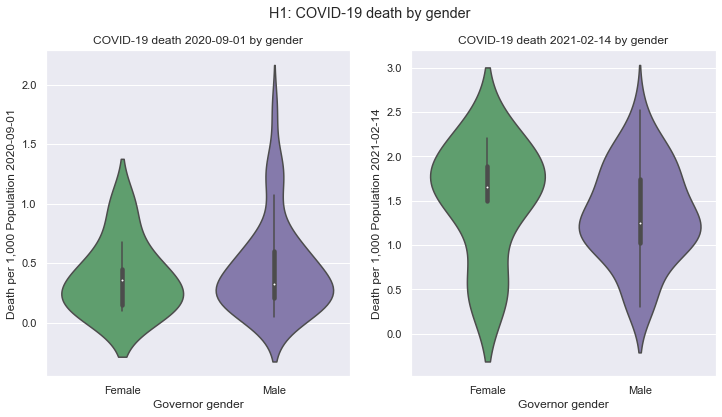

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(x="Governor gender", 
               y="Death per 1,000 Population 2020-09-01",
               data=main_df, 
               palette=["g", "m"],
               ax=axes[0],
               height=5, 
               aspect=1)
sns.violinplot(x="Governor gender", 
               y="Death per 1,000 Population 2021-02-14",
               data=main_df, 
               palette=["g", "m"],
               ax=axes[1],
               height=5, 
               aspect=1)

axes[0].set_title("COVID-19 death 2020-09-01 by gender")
axes[1].set_title("COVID-19 death 2021-02-14 by gender")
fig.suptitle("H1: COVID-19 death by gender")

In [99]:
# Death 2020
y = main_df["Death per 1,000 Population 2020-09-01"]
x = main_df[[
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election",
 "State of emergency",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Population 2018 ",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

death_2020_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


# Death 2021
y = main_df["Death per 1,000 Population 2021-02-14"]
x = main_df[[
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election", 
 "Full control of state legislative Post-election",
 "State of emergency",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Population 2018 ",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

death_2021_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


# Death 2020 with masks and stay home
mask_df = main_df[(main_df["Mandate face mask use by all individuals in public spaces"] != 0)]
home_and_mask_df = mask_df[(mask_df["Stay at home / shelter in place"] != 0)]                         
                           
y = home_and_mask_df["Death per 1,000 Population 2020-09-01"]
x = home_and_mask_df[[
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election",
 "State of emergency",
 "Mandate face mask use by all individuals in public spaces",
 "Stay at home / shelter in place", 
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Population 2018 ",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

death_2020_home_and_mask_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


# Death 2021 with masks and stay home
y = home_and_mask_df["Death per 1,000 Population 2021-02-14"]
x = home_and_mask_df[[
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election",
 "State of emergency",
 "Mandate face mask use by all individuals in public spaces",
 "Stay at home / shelter in place", 
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Population 2018 ",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

death_2021_home_and_mask_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

#create nice gathered ols 
stargazer1 = Stargazer([death_2020_model, 
                        death_2021_model, 
                        death_2020_home_and_mask_model, 
                        death_2021_home_and_mask_model])

stargazer1.custom_columns(["Death per 1,000 Population 2020", 
                           "Death per 1,000 Population 2021", 
                           "Death per 1,000 Population 2020", 
                           "Death per 1,000 Population 2021"], 
                          [1, 1, 1, 1])

stargazer1.covariate_order([ "Stay at home / shelter in place", 
                             "Mandate face mask use by all individuals in public spaces",
                             "Female governor", 
                             "Number of previous female governors",
                             "Party",
                             "Full control of state legislative Pre-election",
                             "State of emergency",
                             "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
                             "Paid sick leave",
                             "Medicaid Expansion",
                             "Population density per square miles",
                             "Population 2018 ",
                             "Number Homeless (2019)",
                             "Percent Unemployed (2018)",
                             "Percent living under the federal poverty line (2018)",
                             "Percent at risk for serious illness due to COVID",
                             "Beds per 1,000 Population", 
                             "const"])

stargazer1.title("Female governors will be more successful in the prevention of COVID-19")

HTML(stargazer1.render_html())

In [100]:
# to export this for a nice word table
Html_file = open("H1.html","w")
Html_file.write(stargazer1.render_html())
Html_file.close()

## H2. Female governors will issue Executive orders to combat COVID-19 earlier.
Flexibility and quick response are suggested as aa key factors to female governors' success in combating COVID-19. By looking at the speed at which female governors act to utilize the Executive Orders for Stay at home / Shelter in place will shine a light on female leadership's key characteristics. This may also point out to wildlings to listen to medical and epidemiological experts – this being a science-driven decision (Sergent & Stajkovic, 2020; Zenger & Folkman, 2020).   

Text(0.5, 0.98, 'H2: Female governors will issue Executive orders to combat COVID-19 earlier')

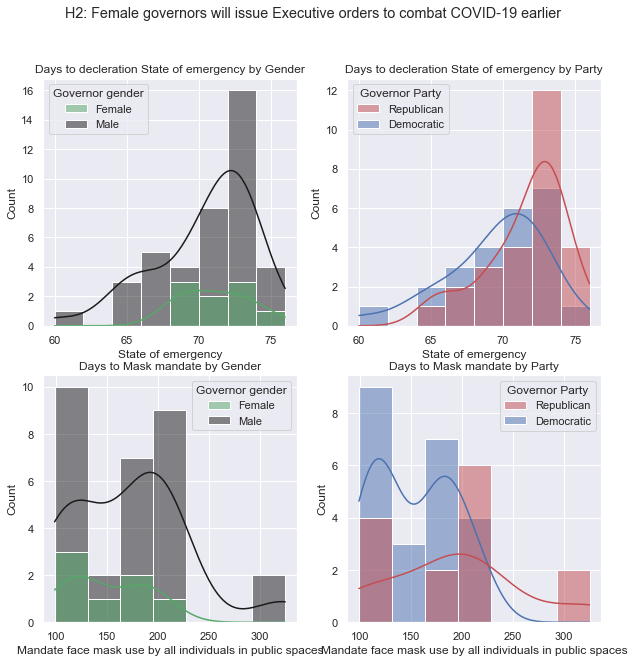

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data = main_df,
             x = "State of emergency", 
             hue="Governor gender", 
             kde=True,
             palette=["g", "k"],
             ax=axes[0, 0])
sns.histplot(data = main_df, 
             x = "State of emergency", 
             hue="Governor Party", 
             kde=True, 
             palette=["r", "b"], 
             ax=axes[0, 1])
sns.histplot(data = main_df[main_df["Mandate face mask use by all individuals in public spaces"] != 0], 
             x = "Mandate face mask use by all individuals in public spaces", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[1, 0])
sns.histplot(data = main_df[main_df["Mandate face mask use by all individuals in public spaces"] != 0], 
             x = "Mandate face mask use by all individuals in public spaces", 
             hue="Governor Party", 
             kde=True, 
             palette=["r", "b"], 
         ax=axes[1, 1])
axes[0, 0].set_title("Days to decleration State of emergency by Gender")
axes[0, 1].set_title("Days to decleration State of emergency by Party")
axes[1, 0].set_title("Days to Mask mandate by Gender")
axes[1, 1].set_title("Days to Mask mandate by Party")
fig.suptitle("H2: Female governors will issue Executive orders to combat COVID-19 earlier")

<AxesSubplot:xlabel='State of emergency', ylabel='Count'>

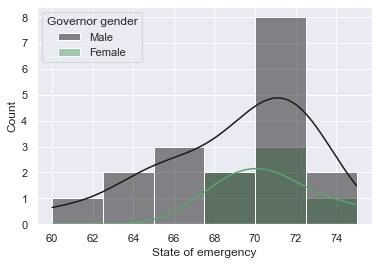

In [102]:
sns.histplot(data = main_df[main_df["Party"] == 1], x = "State of emergency", hue="Governor gender", kde=True, palette=["k", "g"])

In [103]:
multicomp = MultiComparison(main_df["State of emergency"], main_df["Female governor"])
print(multicomp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.6965 0.5785 -1.7555 3.1485  False
---------------------------------------------------


**OLS for H2**

In [104]:
# State of emergency
y = main_df["State of emergency"]
x = main_df[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

state_of_emergency_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Stay at home / shelter in place
main_df_stay_at_home = main_df
main_df_stay_at_home = main_df_stay_at_home[main_df_stay_at_home["Stay at home / shelter in place"] != 0]

y = main_df_stay_at_home["Stay at home / shelter in place"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

stay_at_home_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Closed other non-essential businesses
closed_businesses = main_df
closed_businesses = closed_businesses[closed_businesses["Closed other non-essential businesses"] != 0]

y = closed_businesses["Closed other non-essential businesses"]
x = closed_businesses[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

closed_businesses_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Date closed K-12 public schools
closed_public_schools = main_df
closed_public_schools = closed_public_schools[closed_public_schools["Date closed K-12 public schools"] != 0]

y = closed_public_schools["Date closed K-12 public schools"]
x = closed_public_schools[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

closed_public_schools_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Mandate face mask use by all individuals in public spaces
mandate_face_mask = main_df
mandate_face_masks = mandate_face_mask[mandate_face_mask[
    "Mandate face mask use by all individuals in public spaces"] != 0]

y = mandate_face_mask["Mandate face mask use by all individuals in public spaces"]
x = mandate_face_mask[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

mandate_face_mask_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


#create nice gathered ols 
stargazer2 = Stargazer([state_of_emergency_model, 
                        stay_at_home_model, 
                        closed_businesses_model, 
                        closed_public_schools_model, 
                        mandate_face_mask_model])

stargazer2.custom_columns(["State of emergency", 
                           "Stay at home / shelter in place", 
                           "Closed other non-essential businesses", 
                           "Closed K-12 public schools",
                           "Mandate face mask use by all individuals in public spaces"], 
                          [1, 1, 1, 1, 1])

stargazer2.covariate_order([
                           "Female governor", 
                           "Party",
                           "Number of previous female governors",
                           "Full control of state legislative Pre-election",
                           "Percent at risk for serious illness due to COVID",
                           "Beds per 1,000 Population", 
                           "const"])

stargazer2.title("H2: Female governors will issue Executive orders to combat COVID-19 earlier")

HTML(stargazer2.render_html())

In [105]:
# to export this for a nice word table
Html_file = open("H2.html","w")
Html_file.write(stargazer2.render_html())
Html_file.close()

## H3. Compliance with Executive orders to combat COVID-19 by Female governors will be higher.
Another key dominant feature of women leadership is empathy and emotion awareness. This allows to motivate followers positively, understand their challenges, and respond appropriately to show concern and care (Fox & Oxley, 2003; Tamres et al., 2002; Toussaint & Webb, 2005; Zenger & Folkman, 2020). If this is correct, we should expect to see a much higher compliance rate to Executive orders by female governors. 

Text(0.5, 0.98, 'H3: Compliance with Executive orders to combat COVID-19 by Female governors will be higher')

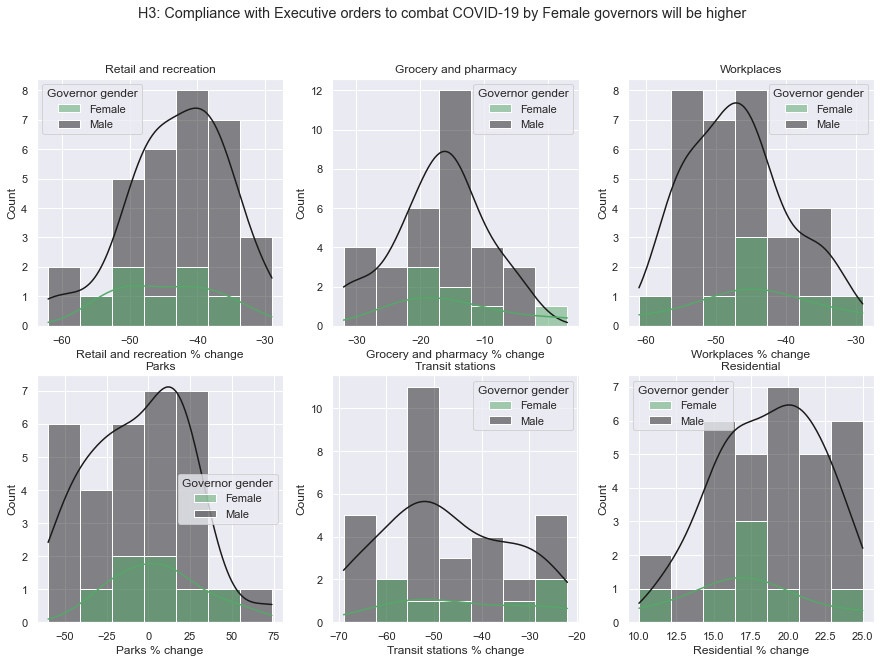

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data = main_df_stay_at_home,
             x = "Retail and recreation % change", 
             hue="Governor gender", 
             kde=True,
             palette=["g", "k"],
             ax=axes[0, 0])
sns.histplot(data = main_df_stay_at_home, 
             x = "Grocery and pharmacy % change", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[0, 1])
sns.histplot(data = main_df_stay_at_home, 
             x = "Parks % change", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[1, 0])
sns.histplot(data = main_df_stay_at_home, 
             x = "Transit stations % change", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[1, 1])
sns.histplot(data = main_df_stay_at_home, 
             x = "Workplaces % change", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[0, 2])
sns.histplot(data = main_df_stay_at_home, 
             x = "Residential % change", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"], 
             ax=axes[1, 2])
axes[0, 0].set_title("Retail and recreation")
axes[0, 1].set_title("Grocery and pharmacy")
axes[1, 0].set_title("Parks")
axes[1, 1].set_title("Transit stations")
axes[0, 2].set_title("Workplaces")
axes[1, 2].set_title("Residential")
fig.suptitle("H3: Compliance with Executive orders to combat COVID-19 by Female governors will be higher")

In [107]:
# Retail and recreation
y = main_df_stay_at_home["Retail and recreation % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

retail_and_recreation_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Grocery and pharmacy
y = main_df_stay_at_home["Grocery and pharmacy % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

grocery_and_pharmacy_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Parks
y = main_df_stay_at_home["Parks % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

parks_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Transit stations
y = main_df_stay_at_home["Transit stations % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

transit_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Workplaces
y = main_df_stay_at_home["Workplaces % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

workplaces_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Residential
y = main_df_stay_at_home["Residential % change"]
x = main_df_stay_at_home[[
       "Percent at risk for serious illness due to COVID",
       "Beds per 1,000 Population",
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election"]]

residential_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


#create nice gathered ols 
stargazer3 = Stargazer([retail_and_recreation_model, 
                        grocery_and_pharmacy_model, 
                        parks_model, 
                        transit_model, 
                        workplaces_model, 
                        residential_model])

stargazer3.custom_columns(["Retail and recreation % change", 
                           "Grocery and pharmacy % change", 
                           "Parks % change", 
                           "Transit stations % change",
                           "Workplaces % change", 
                           "Residential % change"], 
                          [1, 1, 1, 1, 1, 1])

stargazer3.covariate_order([
                           "Female governor", 
                           "Party",
                           "Number of previous female governors",
                           "Full control of state legislative Pre-election",
                           "Percent at risk for serious illness due to COVID",
                           "Beds per 1,000 Population",
                           "const"])

stargazer3.title("H3: Compliance with Executive orders to combat COVID-19 by Female governors will be higher")

HTML(stargazer3.render_html())

In [108]:
# to export this for a nice word table
Html_file = open("H3.html","w")
Html_file.write(stargazer3.render_html())
Html_file.close()

In [109]:
main_df_stay_at_home["Female governor"].value_counts()

0.0    32
1.0     7
Name: Female governor, dtype: int64

## H4. Female governors will close schools later.
Researchers found that female politicians are more likely to introduce legislation on education and children's issues. Therefore, it is expected the female governors will be more keep schools open safely and appropriately. This is also due to their understanding of the burden children at home have on the primary caretaker in most families – the mother (Dickes & Crouch, 2015; Ferrara, 2011; Thomas, 1991). 

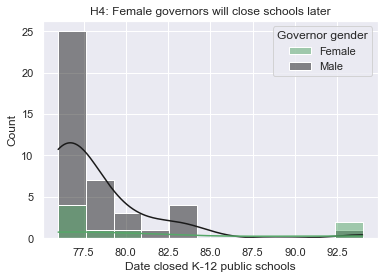

In [110]:
fig = sns.histplot(data = closed_public_schools, 
             x = "Date closed K-12 public schools", 
             hue="Governor gender", 
             kde=True, 
             palette=["g", "k"]).set_title("H4: Female governors will close schools later")

Text(0.5, 1.0, 'H4: Female governors will close schools later')

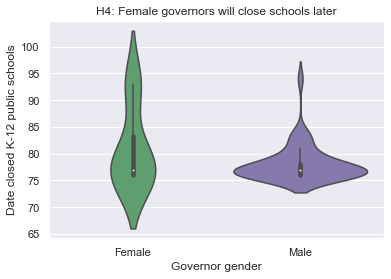

In [111]:
sns.violinplot(x="Governor gender", 
               y="Date closed K-12 public schools",
               data=closed_public_schools, 
               palette=["g", "m"],
               height=5, 
               aspect=1).set_title("H4: Female governors will close schools later")

Text(0.5, 0.98, 'H4: Female governors will close schools later')

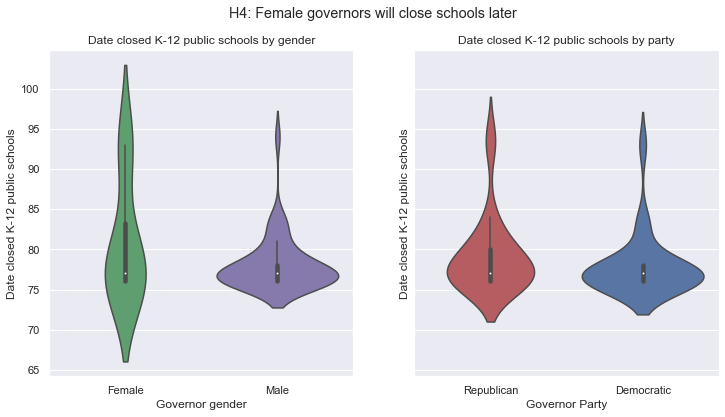

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.violinplot(x="Governor gender", 
               y="Date closed K-12 public schools",
               data=closed_public_schools, 
               palette=["g", "m"],
               ax=axes[0],
               height=5, 
               aspect=1)
sns.violinplot(x="Governor Party", 
               y="Date closed K-12 public schools",
               data=closed_public_schools, 
               palette=["r", "b"],
               ax=axes[1],
               height=5, 
               aspect=1)

axes[0].set_title("Date closed K-12 public schools by gender")
axes[1].set_title("Date closed K-12 public schools by party")
fig.suptitle("H4: Female governors will close schools later")

In [113]:
y = closed_public_schools["Date closed K-12 public schools"]
x = closed_public_schools[[
       "Party",
       "Female governor", 
       "Number of previous female governors",
       "Full control of state legislative Pre-election", 
       "Pre-election alignment",
       "State of emergency", 
       "Expand eligibility of unemployment insurance to those who have lost childcare/school closures"]]

closed_public_schools_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# Death 2020
y = closed_public_schools["Death per 1,000 Population 2020-09-01"]
x = closed_public_schools[["Date closed K-12 public schools",
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election",
 "State of emergency",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

closed_public_schools_death_2020_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()


# Death 2021
y = closed_public_schools["Death per 1,000 Population 2021-02-14"]
x = closed_public_schools[["Date closed K-12 public schools",
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election", 
 "Full control of state legislative Post-election",
 "State of emergency",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

closed_public_schools_death_2020_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

y = closed_public_schools["Expand eligibility of unemployment insurance to those who have lost childcare/school closures"]
x = closed_public_schools[["Date closed K-12 public schools",
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election", 
 "Full control of state legislative Post-election",
 "State of emergency",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"
]]

expand_eligibility_of_unemployment_model = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

#create nice gathered ols 
stargazer4 = Stargazer([closed_public_schools_model, 
                        closed_public_schools_death_2020_model, 
                        closed_public_schools_death_2020_model, 
                        expand_eligibility_of_unemployment_model])

stargazer4.custom_columns(["Date closed K-12 public schools", 
                           "Death per 1,000 Population 2020-09-01", 
                           "Death per 1,000 Population 2021-02-14", 
                           "Expand eligibility of unemployment insurance to those who have lost childcare/school closures"], 
                          [1, 1, 1, 1])

stargazer4.covariate_order([
 "Date closed K-12 public schools",
 "Female governor", 
 "Number of previous female governors",
 "Party",
 "Full control of state legislative Pre-election", 
 "Full control of state legislative Post-election",
 "State of emergency",
 "Expand eligibility of unemployment insurance to those who have lost childcare/school closures",
 "Paid sick leave",
 "Medicaid Expansion",
 "Population density per square miles",
 "Number Homeless (2019)",
 "Percent Unemployed (2018)",
 "Percent living under the federal poverty line (2018)",
 "Percent at risk for serious illness due to COVID",
 "Beds per 1,000 Population"])

stargazer4.title("H4: Female governors will close schools later")

HTML(stargazer4.render_html())

In [114]:
# to export this for a nice word table
Html_file = open("H4.html","w")
Html_file.write(stargazer4.render_html())
Html_file.close()

In [115]:
main_df[main_df["Date closed K-12 public schools"] == 0]

,State,State Abbreviation,State of emergency,Date closed K-12 public schools,Closed day cares,Reopen day cares,Stay at home / shelter in place,Stay at home order' issued but did not specifically restrict movement of the general public,End/relax stay at home/shelter in place,Closed other non-essential businesses,...,Death 2020-09-01,Hospitalized Cumulative 2020-09-01,Death 2021-02-14,Hospitalized Cumulative 2021-02-14,"Death per 1,000 Population 2020-09-01","Death per 1,000 Population 2021-02-14",Pre-election alignment,Post-election alignment,Governor gender,Governor Party
38,Rhode Island,RI,69,0.0,76.0,153.0,88.0,0.0,130.0,90.0,...,1050.0,2528.0,2332.0,8689.0,0.993082,2.205587,1.0,1.0,Female,Democratic


In [116]:
closed_public_schools["Expand eligibility of unemployment insurance to those who have lost childcare/school closures"].value_counts()

0    31
1    18
Name: Expand eligibility of unemployment insurance to those who have lost childcare/school closures, dtype: int64

***fin***